In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
do = pd.read_csv("mnist_train.csv")

In [3]:
do.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l = do['label']

In [5]:
d = do.drop("label",axis = 1)

In [6]:
print(d.shape)

(42000, 784)


In [7]:
print(l.shape)

(42000,)


# Display or plot a number

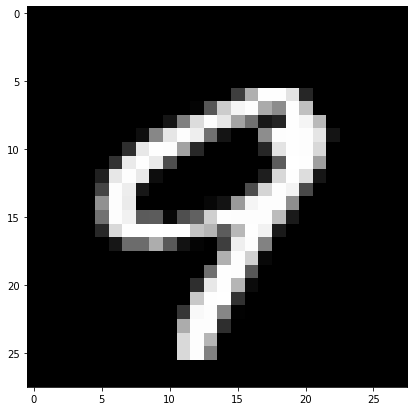

9


In [8]:
plt.figure(figsize=(7,7))
idx = 100
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation = "none",cmap = "gray")
plt.show()
print(l[idx])

# Principal Component Analysis (PCA)

In [9]:
# pick first 15K data points (FOR SIMPLICITY SO THAT THE CODE RUNS FAST)
labels = l.head(15000)
data = d.head(15000)
print("The shape of sample data = ",data.shape)
print("The shape of sample data = ",labels.shape)

The shape of sample data =  (15000, 784)
The shape of sample data =  (15000,)


## Data Preprocessing : Standardizing the data

In [10]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [11]:
# Find the Covariance Matrix which is : A^T * A 
sample_data = standardized_data

# Matrix Multiplication using numpy
covar_matrix  = np.matmul(sample_data.T,sample_data)
print("The shape of Covariance Matrix =",covar_matrix.shape)

The shape of Covariance Matrix = (784, 784)


In [12]:
# Finding the top two Eigen Values and corresponding eigenn Vectors for projecting onto a 2 Dimensional Space
from scipy.linalg import eigh
# the parameter 'eigvals' is defined (low value to  high value)
# eigh function will return the eigen values in ascending order 
# code will generate only the top 2 (782,783) eigen values

values,vectors = eigh(covar_matrix,eigvals = (782,783))
print("Shape of Eigen Vectors :",vectors.shape)

Shape of Eigen Vectors : (784, 2)


In [13]:
# Converting the eigen vectors into 2D shape for easiness of further computation
vectors = vectors.T
print("The updated shape of Eigen Vectors = ",vectors.shape)
# vector[1] represents the eigen vector corresponding to the 1st principal eigen value
# vector[0] represents the eigen vector corresponding to the 2nd principal eigen value

The updated shape of Eigen Vectors =  (2, 784)


In [14]:
# Projecting the neew coordinates formed by sample data and two principal eigen vectors Multiplication
new_coordinates = np.matmul(vectors,sample_data.T)
print("new_coordinates shape = ",vectors.shape,"x",sample_data.T.shape,"=",new_coordinates.shape)

new_coordinates shape =  (2, 784) x (784, 15000) = (2, 15000)


In [15]:
# appending label to the 2nd projected data`
new_coordinates = np.vstack((new_coordinates,labels)).T

In [16]:
#creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st_Principal","2nd_Principal","label")) 
print(dataframe.head())

   1st_Principal  2nd_Principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


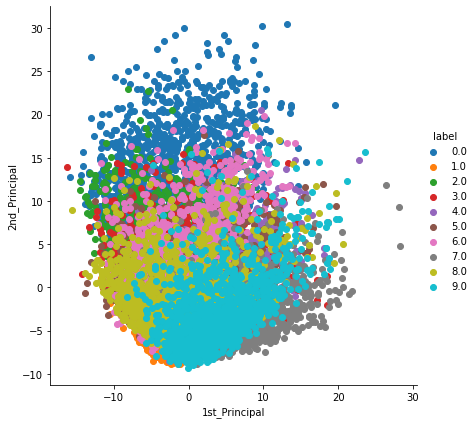

In [17]:
# Plotting the 2D datapoints with Seaborn
import seaborn as sns
sns.FacetGrid(dataframe,hue = "label",size = 6).map(plt.scatter,"1st_Principal","2nd_Principal").add_legend()
plt.show()

# PCA using Scikit Learn

In [18]:
from sklearn import decomposition
pca = decomposition.PCA()

In [19]:
# configuring the parameters 
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [20]:
# pca_reduced will contain the 2D objects of sample data
print("shape pf pca_reduced = ",pca_data.shape)

shape pf pca_reduced =  (15000, 2)


In [21]:
# attaching the label of each 2D data point
pca_data = np.vstack((pca_data.T,labels)).T

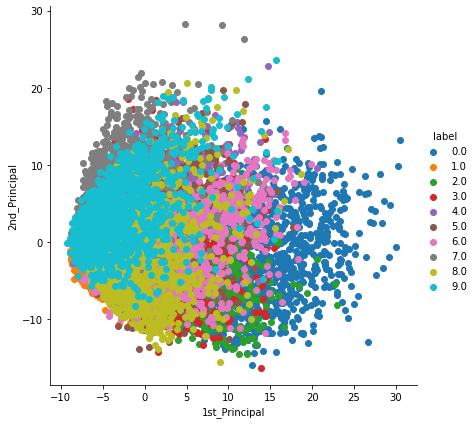

In [22]:
# creating a new data frame which help us in plotting the results
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_Principal","2nd_Principal","label"))
sns.FacetGrid(pca_df,hue = "label",height = 6).map (plt.scatter,"1st_Principal","2nd_Principal").add_legend()
plt.show()

# PCA for Dimensionality Reduction 
### (just for reducing the number of features/dimensions not for visualization)

In [23]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

In [24]:
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum (percentage_var_explained)

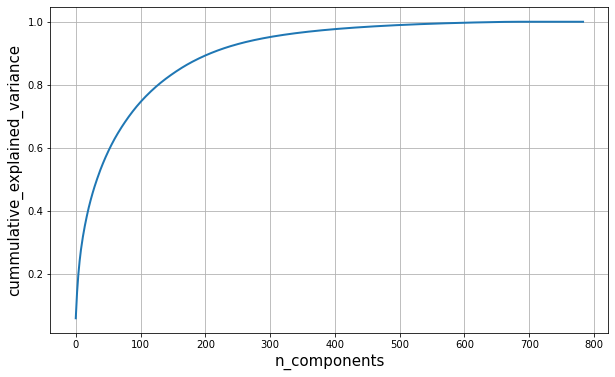

In [25]:
# Plot the PCA Spectrum
plt.figure (1,figsize = (10,6))
plt.clf()
plt.plot(cum_var_explained,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components',size = 15)
plt.ylabel('cummulative_explained_variance',size = 15)
plt.show()
# this figure shows that
# 784 -> 100 (~ 0.75) 75% variance
# 784 -> 200 (~ 0.90) 90% variance
# 784 -> 350 (~ 0.95) 95% variance 
# this how we can check the required number of dimensions required so that the total variance still remains maximum 

# t-SNE using Scikit Learn

In [26]:
from sklearn.manifold import TSNE
# Picking up top 1000 points on TSNE as it takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

In [27]:
model = TSNE(n_components = 2,random_state = 0)
# Configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default maximum number of iterations for optimization = 1000
tsne_data = model.fit_transform(data_1000)

In [28]:
# creating a new data frame which helps us in plotting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim1","Dim2","label"))

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


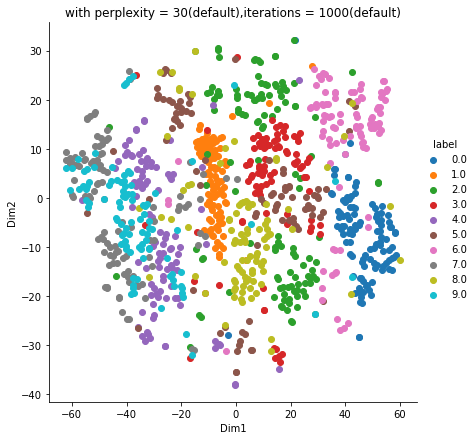

In [29]:
# Plotting  the result of tsne
sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("with perplexity = 30(default),iterations = 1000(default)")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


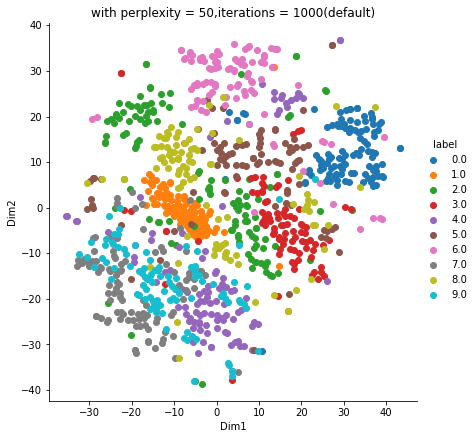

In [30]:
# 1000 points with perplexity = 50 and iterations = 1000
model = TSNE(n_components = 2,random_state = 0,perplexity = 50)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim1","Dim2","label"))
sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("with perplexity = 50,iterations = 1000(default)")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


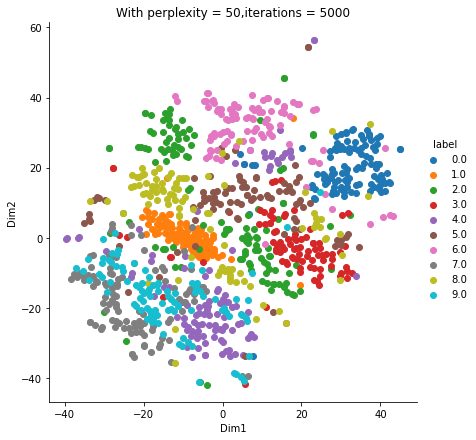

In [31]:
# 1000 points with perplexity = 50 and iterations = 5000
model = TSNE(n_components = 2,random_state = 0,perplexity = 50,n_iter = 5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim1","Dim2","label"))
sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With perplexity = 50,iterations = 5000")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


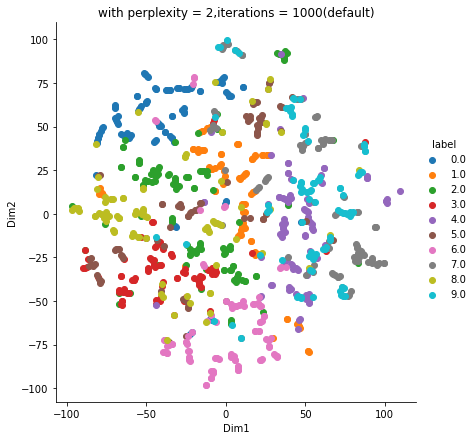

In [32]:
# 1000 points with perplexity = 2 and iterations = 1000
model = TSNE(n_components = 2,random_state = 0,perplexity = 2)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim1","Dim2","label"))
sns.FacetGrid(tsne_df,hue = "label",size = 6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("with perplexity = 2,iterations = 1000(default)")
plt.show()